In [58]:
import pandas as pd
import numpy as np
import DataPreprocessingLibrary as dpl
import string
# https://pypi.org/project/COVID19Py/

pd.set_option('display.max_colwidth', -1)


API_COLUMNS = ["Title", "Description", "NewsURL", "PublishedTime", "SourceName" , "SourceURL"]
# api_content = pd.read_csv("../Data/NewsContentClean.csv")
api_content = pd.read_csv("../Data/NewsContent.csv", index_col=[0])

In [59]:
from textblob import TextBlob
import nltk
from textblob import Word
from textblob.wordnet import VERB

In [60]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [61]:
temp1 = api_content.iloc[-2].Title
print("Showing the results of the original : \n" + str(temp1) + "\n================================================\n")
print("Showing the results of the preprocessed : \n" + str(dpl.preprocess(temp1) + "\n================================================\n"))

Showing the results of the original : 
Coronavirus live updates: US-Canada border closure to continue; Georgia drops mask lawsuit; Hawaii may delay tourists' return

Showing the results of the preprocessed : 
virus live updates  us canada border closure to continue  georgia drops mask lawsuit  hawaii may delay tourists  return



In [62]:
api_content["Title"] = api_content['Title'].apply(dpl.preprocess)
api_content["Description"] = api_content['Description'].apply(dpl.preprocess)

# api_content = api_content.drop(["Title","Description"] , axis = 1) 
# api_content.to_csv("../Data/NewsContentPreprocessed.csv", index= False)

In [63]:
sentiment_value = []
sentiment_value_description = []

sentiment_value_nltk = []
sentiment_value_description_nltk = []

for title in api_content.Title.values:
    sentiment_value.append(  TextBlob( title ).sentiment.polarity  )
    sentiment_value_nltk.append(analyzer.polarity_scores(title)["compound"])
    
for description in api_content.Description.values:
    sentiment_value_description.append(  TextBlob( description ).sentiment.polarity  )
    sentiment_value_description_nltk.append(analyzer.polarity_scores(description)["compound"])
    

In [64]:
api_content["SentimentValueTitle"] = sentiment_value
api_content["SentimentValueDescription"] = sentiment_value_description

api_content["SentimentValueTitleVader"] = sentiment_value_nltk
api_content["SentimentValueDescriptionVader"] = sentiment_value_description_nltk



In [65]:
### General Sentiment value for the title is 0.03, pretty average but still more positive
### General Sentiment value for the description is 0.07, pretty average but still more positive

In [66]:
api_content['SentimentValueTitle'].describe()

count    1674.000000
mean     0.033629   
std      0.213839   
min     -1.000000   
25%      0.000000   
50%      0.000000   
75%      0.125000   
max      1.000000   
Name: SentimentValueTitle, dtype: float64

In [67]:
api_content['SentimentValueDescription'].describe()

count    1674.000000
mean     0.076161   
std      0.201166   
min     -1.000000   
25%      0.000000   
50%      0.037500   
75%      0.182670   
max      1.000000   
Name: SentimentValueDescription, dtype: float64

In [68]:
api_content['SentimentValueTitleVader'].describe()

count    1674.000000
mean    -0.104714   
std      0.371363   
min     -0.911800   
25%     -0.401900   
50%      0.000000   
75%      0.000000   
max      0.812600   
Name: SentimentValueTitleVader, dtype: float64

In [69]:
api_content['SentimentValueDescriptionVader'].describe()


count    1674.000000
mean    -0.006767   
std      0.459778   
min     -0.957800   
25%     -0.381800   
50%      0.000000   
75%      0.361200   
max      0.967400   
Name: SentimentValueDescriptionVader, dtype: float64

In [70]:
sentiment_values_df = api_content.copy()
sentiment_values_df_grouped = sentiment_values_df.groupby("PublishedTime").mean()

In [71]:
api_content.to_csv("../Data/NewsContentPreprocessed.csv")
sentiment_values_df_grouped.to_csv("../Data/SentimentValues.csv")

In [72]:
pd.set_option('display.max_colwidth', 30)

api_content

,Title,Description,NewsURL,PublishedTime,SourceName,SourceURL,SentimentValueTitle,SentimentValueDescription,SentimentValueTitleVader,SentimentValueDescriptionVader
0,white house doesn rule out...,the white house is not rul...,https://abcnews.go.com/Pol...,2020-01-29,ABC,https://abcnews.go.com,0.000000,0.258333,-0.4215,0.0000
1,virus crisis in china to h...,china controls almost ...,https://dfw.cbslocal.com/2...,2020-01-29,CBS Boston / WBZ,https://dfw.cbslocal.com,0.100000,0.300000,-0.6249,0.4215
2,virus cases in us should n...,a deadly virus that killed...,https://www.foxnews.com/he...,2020-01-29,Fox News,https://www.foxnews.com,0.500000,-0.040000,-0.3972,-0.8225
3,us learned from ebola but ...,the department of homelan...,https://www.usatoday.com/s...,2020-01-29,USA Today,https://www.usatoday.com,0.100000,0.000000,-0.2498,0.5859
4,virus japan and us fly ci...,japan and us airlift hundr...,https://www.theguardian.co...,2020-01-29,The Guardian,https://www.theguardian.com,0.800000,0.400000,-0.5994,-0.5994
...,...,...,...,...,...,...,...,...,...,...
1680,virus vaccine research ...,the nation top infectious ...,https://www.msn.com/en-us/...,2020-08-14,CNN on MSN.com,https://www.msn.com,0.000000,0.450000,0.0258,0.1531
1682,us virus herd immunity at...,if the united states allow...,https://www.msn.com/en-us/...,2020-08-14,CNN on MSN.com,https://www.msn.com,0.000000,0.000000,-0.5994,-0.3566
1683,virus blood plasma of rec...,mayo clinic research finds...,https://www.scmp.com/news/...,2020-08-14,South China Morning Post,https://www.scmp.com,-0.650000,0.160000,0.0276,0.0000
1684,virus live updates us can...,hawaii considers another s...,https://www.usatoday.com/s...,2020-08-14,USA Today,https://www.usatoday.com,0.136364,0.500000,-0.4939,0.0000


In [73]:
sentiment_values_df_grouped

,SentimentValueTitle,SentimentValueDescription,SentimentValueTitleVader,SentimentValueDescriptionVader
PublishedTime,,,,
2020-01-29,0.255208,0.153056,-0.438800,-0.069083
2020-01-30,0.022386,0.040869,0.058820,-0.249390
2020-01-31,-0.093182,0.007828,-0.218489,-0.199178
2020-02-01,0.067340,0.135278,-0.117200,0.247789
2020-02-02,0.000000,0.129167,-0.363450,-0.707050
...,...,...,...,...
2020-08-10,0.325000,0.066414,-0.094050,-0.415917
2020-08-11,-0.034291,-0.061445,-0.118208,-0.031385
2020-08-12,0.024858,0.063760,-0.104125,-0.467087


In [74]:
# temp  = pd.read_csv("../Data/SentimentValues.csv", index_col=[0])
# temp  = pd.read_csv("../Data/NewsContentPreprocessed.csv", index_col=[0])
# # temp

In [75]:
showcase = pd.read_csv("../Data/NewsContent.csv", index_col=[0])
showcase["CleanTitle"] = showcase['Title'].apply(dpl.preprocess) 
showcase["CleanDescription"] = showcase['Description'].apply(dpl.preprocess) 
showcase = showcase.drop(["NewsURL" , "SourceName", "SourceURL"], axis = 1)
showcase

,Title,Description,PublishedTime,CleanTitle,CleanDescription
0,White House doesn't rule o...,The White House is not rul...,2020-01-29,white house doesn rule out...,the white house is not rul...
1,Coronavirus Crisis In Chin...,“China controls almost 100...,2020-01-29,virus crisis in china to h...,china controls almost ...
2,Coronavirus cases in US sh...,A deadly coronavirus that'...,2020-01-29,virus cases in us should n...,a deadly virus that killed...
3,US learned from Ebola but ...,“The Department of Homelan...,2020-01-29,us learned from ebola but ...,the department of homelan...
4,Coronavirus: Japan and US ...,Japan and US airlift hundr...,2020-01-29,virus japan and us fly ci...,japan and us airlift hundr...
...,...,...,...,...,...
1680,Covid-19 vaccine research:...,The nation's top infectiou...,2020-08-14,virus vaccine research ...,the nation top infectious ...
1682,US coronavirus: Herd immun...,If the United States allow...,2020-08-14,us virus herd immunity at...,if the united states allow...
1683,Coronavirus: blood plasma ...,Mayo Clinic research finds...,2020-08-14,virus blood plasma of rec...,mayo clinic research finds...
1684,Coronavirus live updates: ...,Hawaii considers another s...,2020-08-14,virus live updates us can...,hawaii considers another s...


In [76]:
temp = showcase.copy()
temp = temp.drop(["PublishedTime", "Description"], axis =1 )

In [77]:
pd.set_option('display.max_colwidth', -1)
temp.iloc[-5]

Title               Covid-19 vaccine research: US scientists considering coronavirus strain for potential human challenge trials as 'Plan D'                                                                              
CleanTitle          virus    vaccine research  us scientists considering virus strain for potential human challenge trials as  plan                                                                                       
CleanDescription    the nation top infectious disease expert  dr  anthony fauci  confirmed to cnn on friday that scientists at the national institute of allergy and infectious diseases are working to have strain of    
Name: 1680, dtype: object

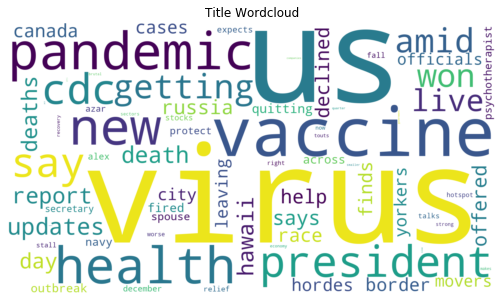

In [78]:
dpl.make_word_cloud(showcase[-30:] , "CleanTitle", "Title Wordcloud")


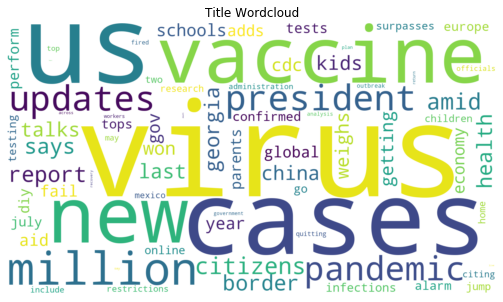

In [79]:
dpl.make_word_cloud(showcase[-60:] , "CleanTitle", "Title Wordcloud")


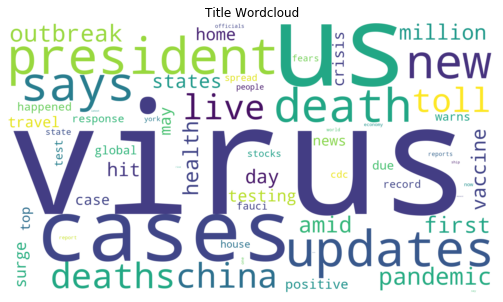

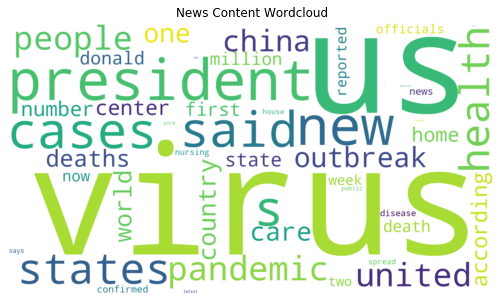

In [80]:

dpl.make_word_cloud(showcase , "CleanTitle", "Title Wordcloud")
dpl.make_word_cloud(showcase, "CleanDescription", "News Content Wordcloud")